In [ ]:

import sobol_seq
from scipy.optimize import minimize
from sklearn.model_selection import ParameterGrid
from scipy import interpolate
from CartPole import *
import numpy as np
import random
import matplotlib.pyplot as plt

# Task 3.2 Linear Policy, Linear Model Noise in true dynamics

In [ ]:
change_CartPole = CartPole()
def plot_evolution_policy(n,p):
    initial_state_arr = np.array([[0, 0, -0.3, 0],[0, 0, 0.2, 0], [0, 0, 0.1, 0], [0, 0, -0.4, 0]])
    x_0 = np.zeros(shape=(4,n))
    x_1 = np.zeros(shape=(4,n))
    x_2 = np.zeros(shape=(4,n))
    x_3 = np.zeros(shape=(4,n))
    x0 = np.zeros([4,n])
    x1 = np.zeros([4,n])
    x2 = np.zeros([4,n])
    x3 = np.zeros([4,n])
    x4 = np.zeros([4,n])

    ind = 0
    for initial_state in initial_state_arr:
        change_CartPole.setState(initial_state)
        l = 0
        for i in range(n):
            cur_state = change_CartPole.getState()
            x0[ind][i], x1[ind][i], x2[ind][i], x3[ind][i] = cur_state[0], cur_state[1], cur_state[2], cur_state[3]
            l += change_CartPole.loss()
            f = np.dot(p, change_CartPole.getState())
            x4[ind][i] = f
            change_CartPole.performAction(f)
            change_CartPole.remap_angle()
        ind += 1
    X = np.array([x0, x1, x2, x3, x4])
    index = 0
    for initial_state in initial_state_arr:
        change_CartPole.setState(initial_state)
        l=0
        for i in range(n):
            nois = 0.05*np.random.normal(0,1,(4,))
            current_state = change_CartPole.getState()
            x_0[index][i] = current_state[0]
            x_1[index][i] = current_state[1]
            x_2[index][i] = current_state[2]
            x_3[index][i] = current_state[3]
            l+= change_CartPole.loss()
            f= np.dot(p,change_CartPole.getState()+nois)
            change_CartPole.performAction(f)
            change_CartPole.remap_angle()
        index +=1
    x = np.array([x_0,x_1,x_2,x_3])
    fig,axs = plt.subplots(2,2, figsize=(12,6))
    t = np.arange(0,0.2*n,0.2)
    indx = 0
    indxx = 0
    labels=['Cart Location','Cart Velocity','Pole Angle', 'Pole Velocity']
    for i in range(2):
        for j in range(2):
            axs[i][j].plot(t,x[indx][0],color='magenta', label = 'Observation Noise')
            axs[i][j].plot(t,X[indx][0],color='black' ,label ='real')
            axs[i][j].set(xlabel='time')
            axs[i][j].set(ylabel=labels[indxx])
            indx+=1
            indxx+=1  
    plt.show()

    fig,axs = plt.subplots(2,2, figsize=(12,6))
    fig.suptitle('Linear Policy, Initial position [0,0,0.2,0]')
    indx = 0
    indxx = 0
    for i in range(2):
        for j in range(2):
            axs[i][j].plot(t,x[indx][1],color='magenta', label = 'Observation Noise')
            axs[i][j].plot(t,X[indx][1],color='black' , label = 'Real')
            axs[i][j].set(xlabel='time')
            axs[i][j].set(ylabel=labels[indxx])
            axs[i][j].set_ylim([-2,2])
            axs[i][j].legend()
            indx+=1
            indxx+=1  
    plt.show()

    fig,axs = plt.subplots(2,2, figsize=(12,6))
    indx = 0
    indxx = 0
    for i in range(2):
        for j in range(2):
            axs[i][j].plot(t,x[indx][2],color='magenta', label = 'Observation Noise')
            axs[i][j].plot(t,X[indx][2],color='black', label = 'Real' )
            axs[i][j].set(xlabel='time')
            axs[i][j].set(ylabel=labels[indxx])
            indx+=1
            indxx+=1  
    plt.show()

    fig,axs = plt.subplots(2,2, figsize=(12,6))
    indx = 0
    indxx = 0
    for i in range(2):
        for j in range(2):
            axs[i][j].plot(t,x[indx][3],color='magenta', label = 'Observation Noise')
            axs[i][j].plot(t,X[indx][3],color='blue' , label = 'Real')
            axs[i][j].set(xlabel='time')
            axs[i][j].set(ylabel=labels[indxx])
            indx+=1
            indxx+=1  
    plt.show()

### Optimizing parameter

In [ ]:
def plot_evolution_policy_min(p):
    n =35
    initial_state_arr = np.array([[0, 0, 0.2, 0], [0, 0, 0.1, 0]])
    x_0 = np.zeros(shape=(4,n))
    x_1 = np.zeros(shape=(4,n))
    x_2 = np.zeros(shape=(4,n))
    x_3 = np.zeros(shape=(4,n))
    x0 = np.zeros([4,n])
    x1 = np.zeros([4,n])
    x2 = np.zeros([4,n])
    x3 = np.zeros([4,n])
    x4 = np.zeros([4,n])
    index = 0
    for initial_state in initial_state_arr:
        change_CartPole.setState(initial_state)
        l=0
        for i in range(n):
            nois = 0.05*np.random.normal(0,1,(4,))
            current_state = change_CartPole.getState()+nois
            x_0[index][i] = current_state[0]
            x_1[index][i] = current_state[1]
            x_2[index][i] = current_state[2]
            x_3[index][i] = current_state[3]
            l+= change_CartPole.loss()
            f= np.dot(p,change_CartPole.getState()+nois)
            change_CartPole.performAction(f)
            change_CartPole.remap_angle()
        index +=1
    return(l)

In [ ]:
x0 =[0.7051,1.21512,16.311,2.506]
x1 = [1, 10,10,10]
res = minimize(plot_evolution_policy_min, x1, method='Nelder-Mead', tol=1e-3, options = {'maxiter' : 2000, 'disp':True})

In [ ]:
print(res.x)

[ 1.02529516 10.23547077  9.51220894 10.26293659]


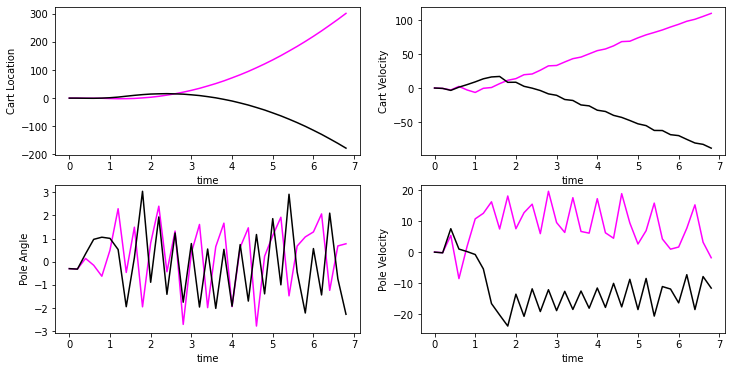

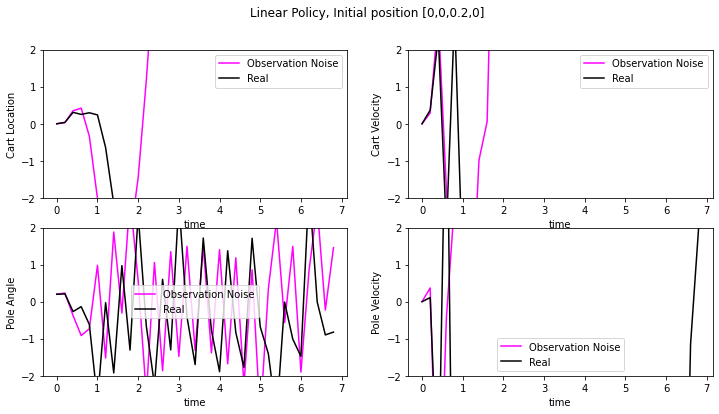

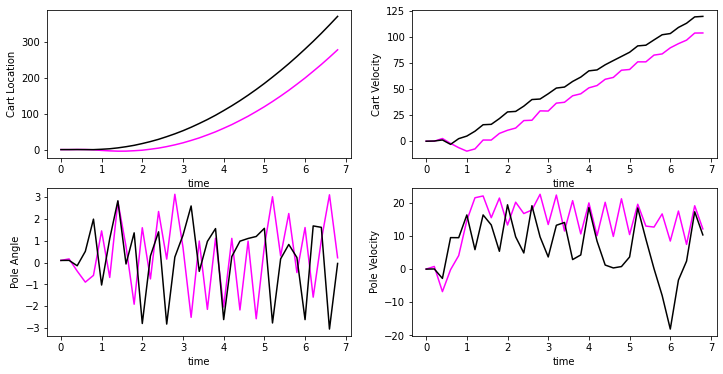

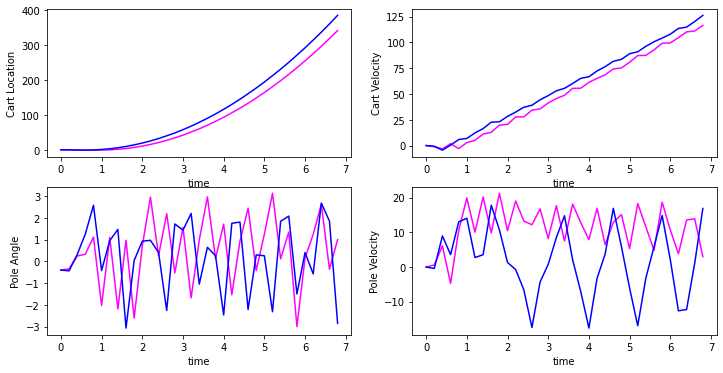

In [ ]:
plot_evolution_policy(35,res.x)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=180073fb-9c10-447b-b721-e7b1d25fe36a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>